In [67]:
# EDA dan Plot library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Load data

In [7]:
df = pd.read_csv("heart.csv")
df.shape

(1025, 14)

## Data Exploration (exploratory data analysis or EDA)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


## Frekuensi jenis kelamin

In [11]:
# Cari tahu berapa banyak nilai dari target
df["target"].value_counts().sort_values(ascending=True)

0    499
1    526
Name: target, dtype: int64

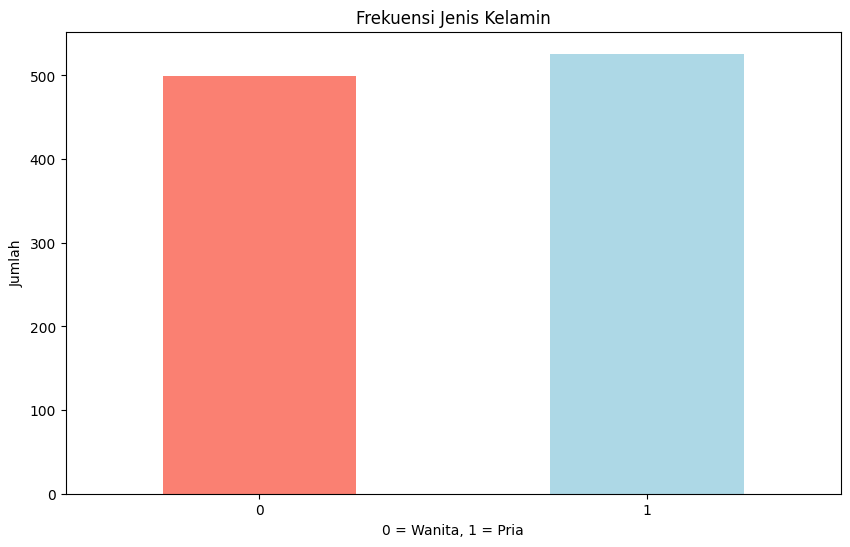

In [12]:
df["target"].value_counts().sort_values(ascending=True).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"]);

plt.title("Frekuensi Jenis Kelamin")
plt.xlabel("0 = Wanita, 1 = Pria")
plt.ylabel("Jumlah")
plt.xticks(rotation=0);


In [13]:
# melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [14]:
# melihat data yang hilang
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Frekuensi Penyakit Jantung dengan Jenis Kelamin

In [16]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [17]:
# bandingkan kolom target dengan sex
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


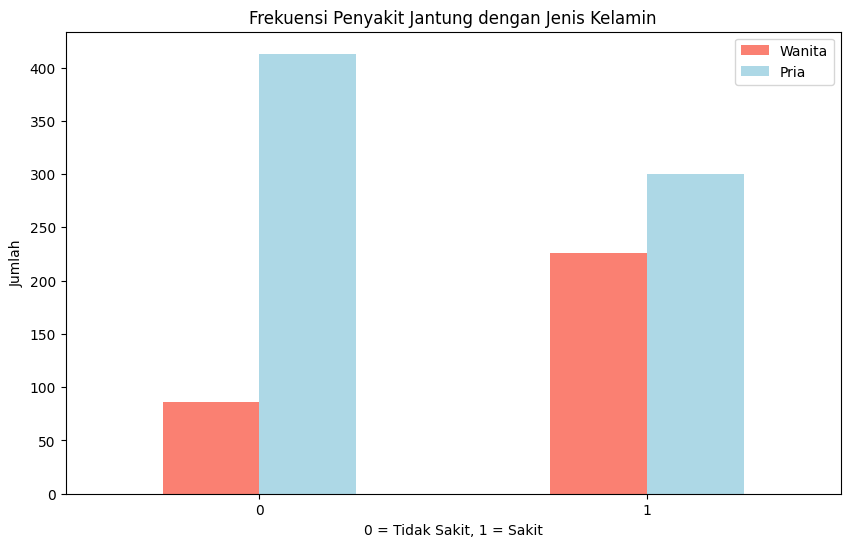

In [18]:
# membuat plot crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"]);

plt.title("Frekuensi Penyakit Jantung dengan Jenis Kelamin");
plt.xlabel("0 = Tidak Sakit, 1 = Sakit");
plt.ylabel("Jumlah");
plt.legend(["Wanita", "Pria"]);
plt.xticks(rotation=0);

## Usia dan Denyut Jantung Maksimal

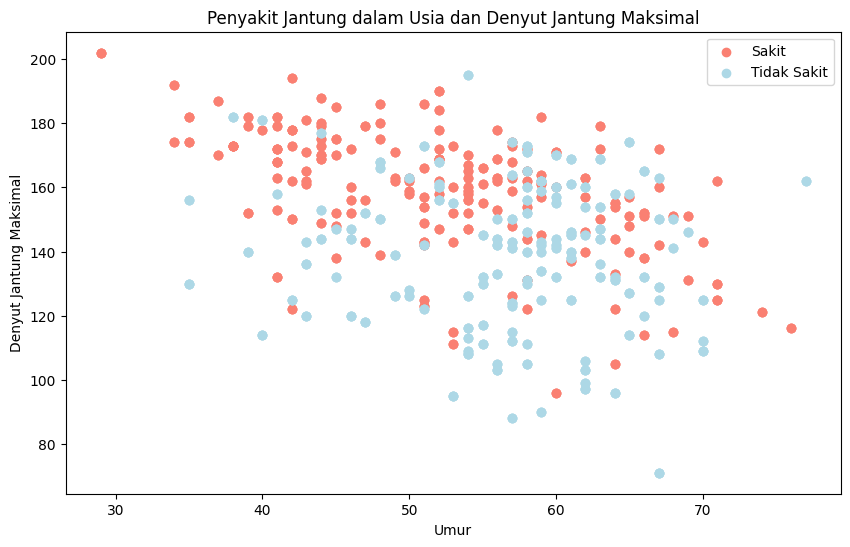

In [19]:
plt.figure(figsize=(10, 6))

# scatter
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

plt.title("Penyakit Jantung dalam Usia dan Denyut Jantung Maksimal")
plt.xlabel("Umur")
plt.ylabel("Denyut Jantung Maksimal")
plt.legend(["Sakit", "Tidak Sakit"]);

Pada scatter plot diatas tampak semakin muda seseorang, semakin tinggi detak jantung maksimum mereka.

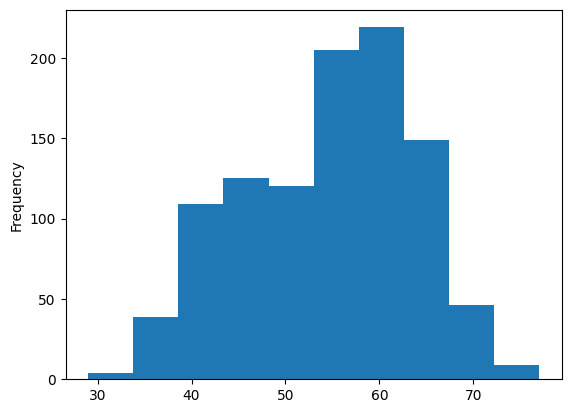

In [20]:
# cek distribusi kolom umur
df.age.plot.hist();

Ini adalah distribusi normal tetapi sedikit bergeser kekanan.

## Frekuensi Penyakit Jantung per Jenis Nyeri Dada
Mencoba variabel lain, kali ini nyeri dada (cp)

In [21]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


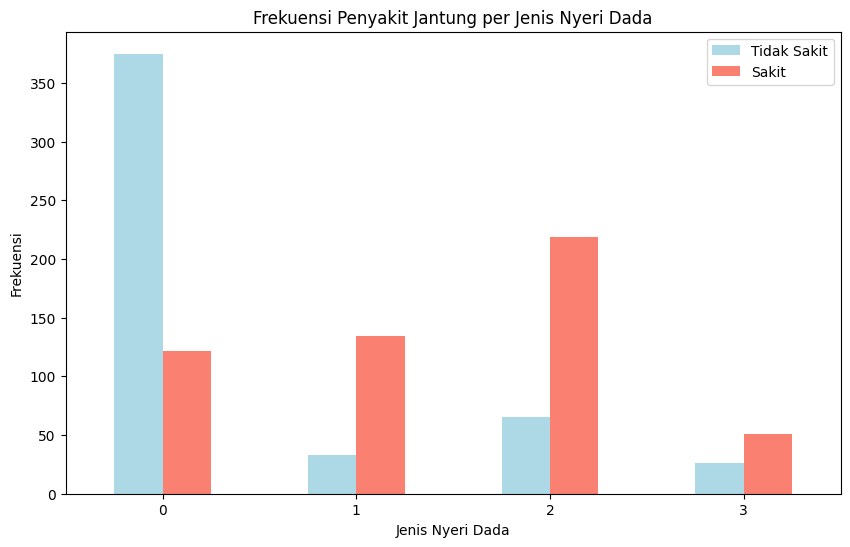

In [22]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["lightblue", "salmon"])

plt.title("Frekuensi Penyakit Jantung per Jenis Nyeri Dada")
plt.xlabel("Jenis Nyeri Dada")
plt.ylabel("Frekuensi")
plt.legend(["Tidak Sakit", "Sakit"])
plt.xticks(rotation=0);

*   cp - chest pain type
*   0: Typical angina: nyeri dada terkait mengurangi suplai darah ke jantung
*   1: Atypical angina: nyeri dada tidak berhubungan dengan jantung
*   2: Non-anginal pain: biasanya kejang esofagus (tidak berhubungan dengan jantung)
*   3: Asymptomatic: nyeri dada tidak menunjukkan tanda-tanda penyakit






## Korelasi antara Variabel Bebas
Tabel korelasi memberikan gambaran tentang variabel mana yang mungkin atau tidak berdampak pada variabel target.

In [23]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


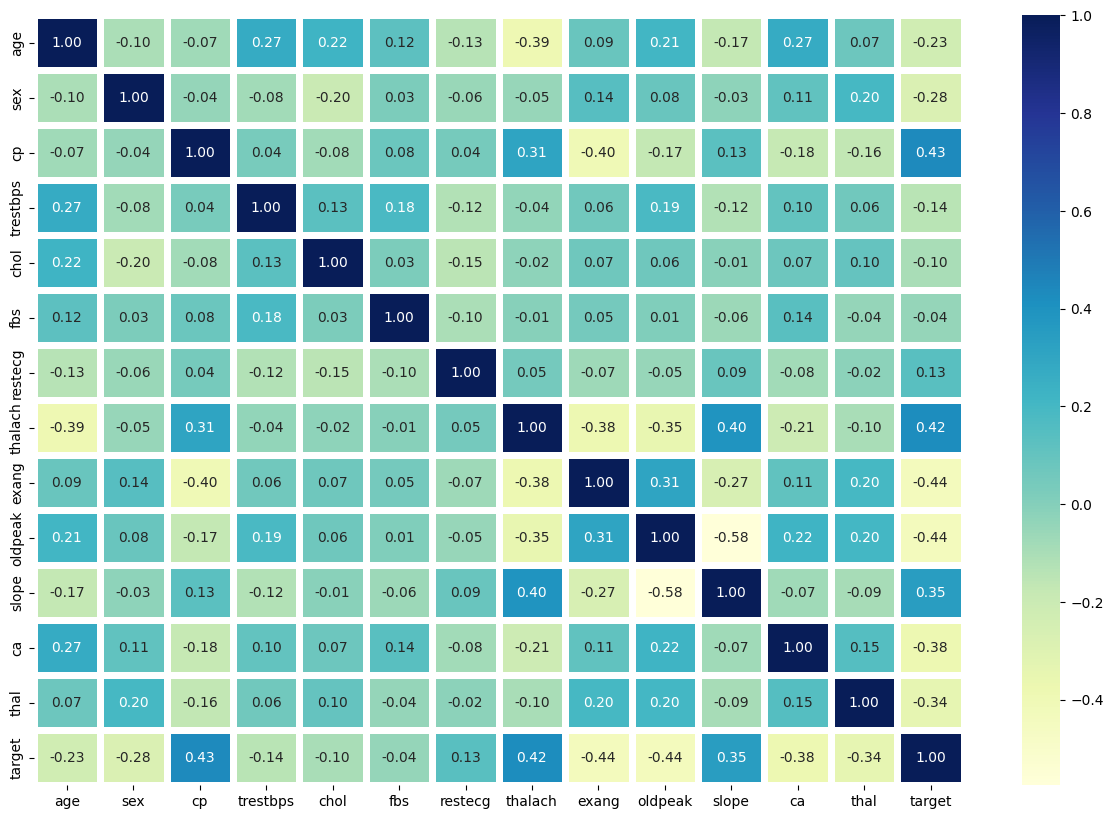

In [24]:
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidth=5,
            fmt=".2f",
            cmap="YlGnBu");

Koefisien korelasi bernilai negatif, berarti hubungan antara kedua variabel tersebut negatif atau saling berbanding terbalik. Koefisien korelasi bernilai positif, berarti hubungan antara kedua variabel tersebut positif atau saling berbanding lurus.

## Pemodelan

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [26]:
# Variabel bebas
X = df.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [28]:
# Variabel terikat
y = df.target.values
y

array([0, 0, 0, ..., 0, 1, 0])

## Split Data

In [29]:
np.random.seed(8)

Fungsi seed digunakan untuk menyimpan status fungsi random, sehingga dapat menghasilkan angka acak yang sama pada beberapa eksekusi kode pada mesin yang sama atau pada mesin yang berbeda (untuk nilai seed tertentu). Nilai seed adalah angka nilai sebelumnya yang dihasilkan oleh generator. Untuk pertama kalinya ketika tidak ada nilai sebelumnya, ia menggunakan waktu sistem saat ini.

In [30]:
for i in range(5):
    np.random.seed(8)
    print(np.random.randint(1, 1000))

452
452
452
452
452


In [31]:
## Split data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [32]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
125,60,0,3,150,240,0,1,171,0,0.9,2,0,2
109,54,1,0,110,206,0,0,108,1,0.0,1,1,2
554,58,1,0,100,234,0,1,156,0,0.1,2,1,3
680,42,1,1,120,295,0,1,162,0,0.0,2,0,2
674,63,1,0,130,330,1,0,132,1,1.8,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,37,1,2,130,250,0,1,187,0,3.5,0,0,2
136,55,0,1,132,342,0,1,166,0,1.2,2,0,2
986,55,0,0,180,327,0,2,117,1,3.4,1,0,2
133,50,1,2,129,196,0,1,163,0,0.0,2,0,2


In [33]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
427,57,1,2,150,168,0,1,174,0,1.6,2,0,2
503,45,0,1,130,234,0,0,175,0,0.6,1,0,2
51,57,0,0,140,241,0,1,123,1,0.2,1,0,3
944,66,0,0,178,228,1,1,165,1,1.0,1,2,3
307,44,1,1,120,220,0,1,170,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,68,1,2,118,277,0,1,151,0,1.0,2,1,3
810,40,1,0,110,167,0,0,114,1,2.0,1,0,3
781,58,1,0,146,218,0,1,105,0,2.0,1,1,3
909,50,1,0,144,200,0,0,126,1,0.9,1,0,3


In [34]:
y_train, len(y_train)

(array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
        0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
        0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 

In [35]:
y_test, len(y_test)

(array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
        1, 0, 1, 0, 0, 0, 1]),
 205)

## Membandingkan Model Machine Learning


*   Logistic Regression
*   K-Nearest Neighbors
*   Random Forest





In [36]:
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Menyesuaikan dan mengevaluasi model machine learning.
    models: dictionary dari model pembelajaran mesin Scikit-Learn yang berbeda.
    X_train: training data
    X_test: testing data
    y_train: label yang terkait dengan data pelatihan
    y_test: label yang terkait dengan data testing
    """
    np.random.seed(8)
    # Membuat dictionary untuk menyimpan skor model
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

## Menggunakan Parameter Default

In [37]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6878048780487804,
 'Logistic Regression': 0.8195121951219512,
 'Random Forest': 1.0}

## Perbandingan Model

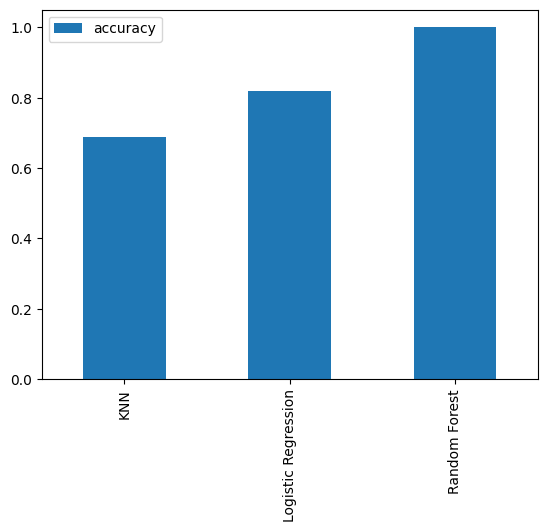

In [38]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

## Menggunakan Hyperparameter Tuning dan Cross Validation

### Tune Parameter KNN
Dengan mencoba beberapa nilai n_neighbors yang berbeda.

In [39]:
# List train scores
train_scores = []

# List test scores
test_scores = []

# Mencoba beberapa nilai n
neighbors = range(1,21)

# algoritma
knn = KNeighborsClassifier()

# Loop
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)

    # Update scores
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [40]:
train_scores

[1.0,
 0.9939024390243902,
 0.9902439024390244,
 0.9414634146341463,
 0.9048780487804878,
 0.8304878048780487,
 0.8097560975609757,
 0.7963414634146342,
 0.7780487804878049,
 0.774390243902439,
 0.7902439024390244,
 0.7841463414634147,
 0.7926829268292683,
 0.7792682926829269,
 0.7646341463414634,
 0.774390243902439,
 0.7914634146341464,
 0.802439024390244,
 0.775609756097561,
 0.7658536585365854]

In [41]:
test_scores

[1.0,
 0.9512195121951219,
 0.9219512195121952,
 0.7902439024390244,
 0.6878048780487804,
 0.6878048780487804,
 0.6878048780487804,
 0.6829268292682927,
 0.6829268292682927,
 0.6634146341463415,
 0.6536585365853659,
 0.6682926829268293,
 0.7121951219512195,
 0.6829268292682927,
 0.6780487804878049,
 0.6829268292682927,
 0.7073170731707317,
 0.7268292682926829,
 0.7170731707317073,
 0.6780487804878049]

Nilai KNN tertinggi pada data test: 100.00%


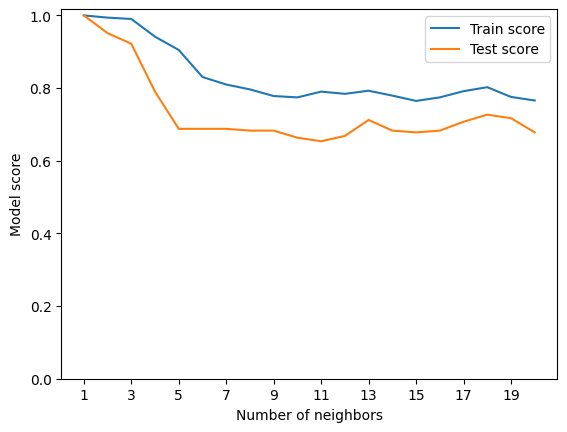

In [42]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 2))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.ylim(ymin=0)
plt.legend()

print(f"Nilai KNN tertinggi pada data test: {max(test_scores)*100:.2f}%")

## RandomizedSearch()

In [43]:
# Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [44]:
np.random.seed(8)

#LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [45]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.03359818286283781}

In [46]:
rs_log_reg.score(X_test, y_test)

0.8439024390243902

Setelah menggunakan RandomizedSearchCV() model Logistic Regression masih memiliki akurasi yang sama ketika menggunakan parameter default.

In [47]:
np.random.seed(8)

#RandomForestClassifier
rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)

rs_rfc.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [48]:
rs_rfc.best_params_

{'n_estimators': 910,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': None}

In [49]:
rs_rfc.score(X_test, y_test)

0.926829268292683

## GridSearchCV()

In [50]:
np.random.seed(8)

#LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid=log_reg_grid,
                                cv=5,
                                verbose=True)

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [51]:
gs_log_reg.best_params_

{'C': 0.03359818286283781, 'solver': 'liblinear'}

In [52]:
gs_log_reg.score(X_test, y_test)

0.8439024390243902

## Evaluation Model Klasifikasi

In [53]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1])

In [54]:
y_test

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1])

## Confusion Matrix

In [56]:
print(confusion_matrix(y_test, y_preds))

[[ 70  26]
 [  6 103]]


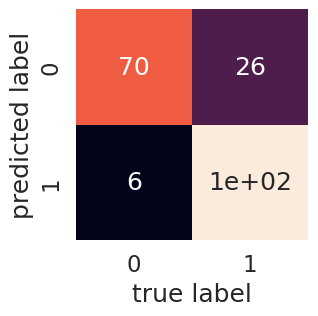

In [57]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")

plot_conf_mat(y_test, y_preds)

## Classification Report

In [58]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        96
           1       0.80      0.94      0.87       109

    accuracy                           0.84       205
   macro avg       0.86      0.84      0.84       205
weighted avg       0.86      0.84      0.84       205



In [59]:
gs_log_reg.best_params_

{'C': 0.03359818286283781, 'solver': 'liblinear'}

In [60]:
clf = LogisticRegression(C=1.623776739188721,
                         solver="liblinear")

In [61]:
# Accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.88780488, 0.85853659, 0.87317073, 0.8195122 , 0.8       ])

In [62]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8478048780487806

In [63]:
# Precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8226314773669621

In [64]:
# Recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.8974303683737646

In [65]:
# F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8583430306540801

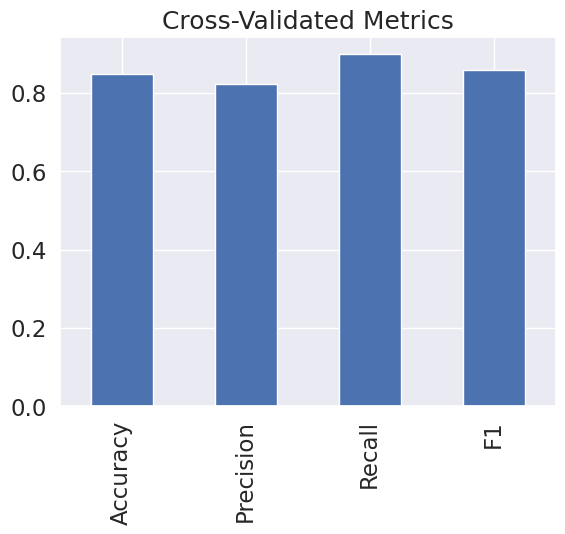

In [66]:
# Visualizing
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                            index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);